In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../src")
sys.path.append("../../CompoTree/src")

In [3]:
from gensim.models import KeyedVectors
from fluidvec import create_fluid_keyvec, VocabSet

/Users/seantyh/anaconda3/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [4]:
vs = VocabSet.load()
wvocab = vs.word_vocab

In [5]:
fkv = create_fluid_keyvec("../data/model/fluidvec-char.b.1", "../data/model/fluidvec-compo.b.1")
fkv

device:  cpu
n_neg_sample:  5
device:  cpu
n_neg_sample:  5


<FluidKeyedVectors: 217350 words, 20396 chars, 3504 compos, 100 dimensions>

In [6]:
fkv.most_similar("/社.", no_compo=True)

[('.構/', 0.792674720287323),
 ('.育/', 0.789618194103241),
 ('.治/', 0.7849012017250061),
 ('.識/', 0.781531035900116),
 ('.範/', 0.7783614993095398),
 ('.值.', 0.7776779532432556),
 ('/族.', 0.7772347331047058)]

In [7]:
fkv.most_similar("社", use_compo_vec=True)

compo tokens:  ['⿰0-礻', '⿰1-土']


[('⿰0-礻', 0.9354299902915955),
 ('/社.', 0.9329457879066467),
 ('⿰1-土', 0.9305049180984497),
 ('.教/', 0.811307430267334),
 ('.治/', 0.8081908822059631),
 ('/教.', 0.7963684797286987),
 ('.育/', 0.7960652709007263),
 ('/理.', 0.7934107780456543),
 ('/文.', 0.7913244366645813),
 ('⿲0-彳', 0.7910422086715698)]

In [11]:
fkv.most_similar("⿰0-礻", word_only=True, topn=20)

[('暨', 0.07487864792346954, 334),
 ('的', 0.05358472838997841, 581858),
 ('名為', 0.048954617232084274, 244),
 ('散發', 0.044144075363874435, 155),
 ('—', 0.041399288922548294, 18),
 ('中心', 0.04069190099835396, 5002),
 ('與', 0.03320188820362091, 42852),
 ('基金會', 0.025380894541740417, 1110),
 ('象徵', 0.020593959838151932, 657),
 ('文教', 0.019141286611557007, 220),
 ('公益', 0.017778903245925903, 223),
 ('慈善', 0.017018035054206848, 138),
 ('成為', 0.01619262620806694, 6069),
 ('和', 0.016085686162114143, 35974),
 ('總監', 0.013204511255025864, 90),
 ('關懷', 0.011141253635287285, 760),
 ('及', 0.01106557808816433, 25433),
 ('協會', 0.010267630219459534, 1359),
 ('上流', 0.009319797158241272, 50),
 ('當成', 0.008477253839373589, 373)]

In [88]:
fkv.serialize_components("漿")

['⿱0-將', '⿱1-水']

In [19]:
fkv.most_similar("⿰0-氵", word_only=True)

[('的', 0.04892851412296295, 581858),
 ('處於', 0.028621377423405647, 472),
 ('海洋', 0.018673008307814598, 575),
 ('地層', 0.011452415026724339, 71),
 ('海域', 0.009118983522057533, 249),
 ('沿岸', 0.008843140676617622, 123),
 ('和', 0.002346042776480317, 35974),
 ('與', 0.0014374592574313283, 42852),
 ('及', 0.0013551716692745686, 25433),
 ('石油', -0.005789690185338259, 350)]

In [20]:
fkv.most_similar("⿰0-火", word_only=True)

[('熱', 0.0993218943476677, 676),
 ('夾帶', 0.08719050139188766, 60),
 ('炒', 0.07310660183429718, 214),
 ('倒入', 0.07124919444322586, 43),
 ('放進', 0.07056201994419098, 113),
 ('泥', 0.06761052459478378, 105),
 ('油', 0.06288215517997742, 318),
 ('碎', 0.062458451837301254, 95),
 ('火', 0.061424270272254944, 463),
 ('微', 0.05963588505983353, 200)]

In [87]:
fkv.most_similar("⿰0-糹", no_compo=True, topn=40)

[('/公.', 0.8562732338905334),
 ('<COMPO_NA>', 0.8516265749931335),
 ('/分.', 0.8424791097640991),
 ('/經.', 0.8276681900024414),
 ('.約/', 0.8231910467147827),
 ('/結.', 0.8206050992012024),
 ('/大.', 0.814242959022522),
 ('/連.', 0.8132200837135315),
 ('/上.', 0.8113311529159546)]

In [83]:
[x for x in fkv.most_similar("⿰0-糹", word_only=True, topn=20) if len(x[0])==2]

[('全球', 0.005409020930528641, 1852),
 ('長達', -0.008457393385469913, 312),
 ('軌道', -0.017166756093502045, 234),
 ('光碟', -0.023004472255706787, 410),
 ('面板', -0.025451771914958954, 88),
 ('衛星', -0.029199106618762016, 514),
 ('石油', -0.0295607540756464, 350),
 ('電子', -0.030297257006168365, 1558),
 ('處於', -0.03210952505469322, 472)]

In [69]:
[x for x in fkv.most_similar("⿱0-艹", word_only=True, topn=20) if len(x[0])==2]

[('散發', 0.032437052577733994, 155),
 ('伴隨', 0.010426241904497147, 167),
 ('葡萄', 0.0015358999371528625, 104),
 ('帶有', -0.008030921220779419, 286),
 ('香草', -0.008797876536846161, 109),
 ('蕃茄', -0.012473962269723415, 84),
 ('草本', -0.01326298713684082, 31),
 ('東方', -0.016268091276288033, 574)]

In [89]:
fkv.most_similar("⿱1-水", word_only=True)

[('溫泉', 0.37413570284843445, 296),
 ('知本', 0.2858501374721527, 42),
 ('溫泉區', 0.2724846303462982, 32),
 ('梨山', 0.2666378617286682, 47),
 ('山莊', 0.263963907957077, 102),
 ('特產', 0.26156124472618103, 89),
 ('縱谷', 0.2533101439476013, 31),
 ('農園', 0.2524462342262268, 49),
 ('香草', 0.24879825115203857, 109),
 ('草莓園', 0.24819016456604004, 23)]

In [94]:
fkv.most_similar("燈", use_compo_vec=True, word_only=True, topn=5)

compo tokens:  ['⿰0-火', '⿰1-登']


[('夾帶', 0.10336803644895554, 60),
 ('做成', 0.06827497482299805, 236),
 ('油', 0.06175651773810387, 318),
 ('透明', 0.05248327553272247, 244),
 ('放進', 0.052128687500953674, 113)]

In [92]:
fkv.most_similar("/燈.", word_only=True, topn=5)

[('閃閃', 0.09162089228630066, 74),
 ('上方', 0.08314590156078339, 116),
 ('金色', 0.0788687989115715, 102),
 ('配上', 0.07819359004497528, 108),
 ('燈光', 0.07208855450153351, 283)]

In [15]:
fkv.most_similar("街燈", use_char_vec=True, word_only=True, topn=10)

in word vocab:  True
char tokens:  ['/街.', '.燈/']


[('沿著', 0.12252667546272278, 148),
 ('眺望', 0.11422909051179886, 60),
 ('圍繞', 0.11243623495101929, 138),
 ('穿過', 0.0858106017112732, 185),
 ('漫步', 0.0850994810461998, 77),
 ('後方', 0.0849408209323883, 119),
 ('廣場', 0.08370000869035721, 714),
 ('環繞', 0.07903441786766052, 129),
 ('蜿蜒', 0.07894289493560791, 71),
 ('四周', 0.07583945244550705, 395)]

In [17]:
fkv.most_similar("街燈", topn=10)

[('前院', 0.9281614422798157),
 ('枯黃', 0.9269572496414185),
 ('篝火', 0.9216689467430115),
 ('一群群', 0.9210391640663147),
 ('不一會', 0.9192306995391846),
 ('灰濛濛', 0.9190659523010254),
 ('霓虹', 0.9171066284179688),
 ('密林', 0.91608065366745),
 ('昏黃', 0.9158151745796204),
 ('碎石', 0.9147357940673828)]

In [ ]:
fkv.most_similar("理", use_compo_vec=True, word_only=True)

In [64]:
fkv.serialize_components("蠟")

['⿰0-虫', '⿰1-巤']

In [65]:
v1 = fkv.get_vector("⿰0-扌", norm=True)
v2 = fkv.get_vector("⿱1-手", norm=True)
v3 = fkv.get_vector("/手/", norm=True)
v4 = fkv.get_vector("/手.", norm=True)
v5 = fkv.get_vector(".手/", norm=True)

print("(v1, v2) vs. v3", v1.dot(v3), v2.dot(v3))
print("(v1, v2) vs. v4", v1.dot(v4), v2.dot(v4))
print("(v1, v2) vs. v5", v1.dot(v5), v2.dot(v5))

(v1, v2) vs. v3 0.64788085 0.6527608
(v1, v2) vs. v4 0.66329366 0.6120678
(v1, v2) vs. v5 0.71966636 0.7860856


In [58]:
xx = [x[0] for x in fkv.ctree.find("糹", use_flag="shortest", max_depth=1)]

In [59]:
xx = [x for x in xx if x in fkv.words]

In [60]:
from tqdm.auto import tqdm
scores = []
v_x = fkv.get_vector("⿰0-糹", norm=True)
for ch in tqdm(xx):
    if f"/{ch}." not in fkv.chars:
        continue
    v_y = fkv.get_vector(f"/{ch}.", norm=True)
    scores.append(v_x.dot(v_y))

## 糹部件 vs 有糹的字（當詞首）

0.19757982

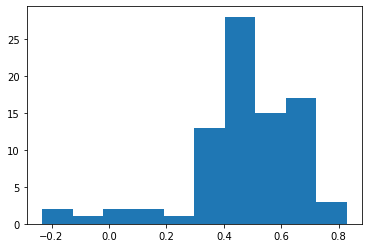

In [63]:
plt.hist(scores)
import numpy as np
np.std(scores)

## 水部件 vs 有水的字（當詞首）

(array([ 6.,  9.,  6., 13., 23., 22., 36., 45., 37., 15.]),
 array([-0.08759472,  0.00236583,  0.09232638,  0.18228693,  0.27224746,
         0.362208  ,  0.45216858,  0.5421291 ,  0.6320897 ,  0.7220502 ,
         0.81201077], dtype=float32),
 <BarContainer object of 10 artists>)

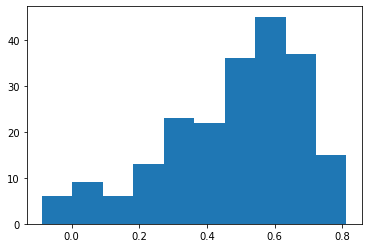

In [56]:
plt.hist(scores)

## 手部件vs有手的字（當詞手）

(array([ 6., 12., 12., 18., 18., 32., 38., 47., 27., 11.]),
 array([-0.06171989,  0.02711261,  0.11594512,  0.20477763,  0.29361016,
         0.38244265,  0.47127515,  0.56010765,  0.6489402 ,  0.7377727 ,
         0.8266052 ], dtype=float32),
 <BarContainer object of 10 artists>)

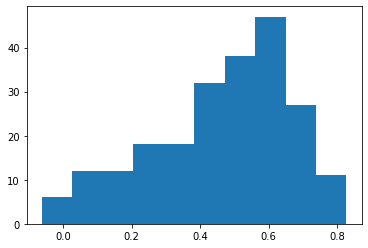

In [50]:
import matplotlib.pyplot as plt
plt.hist(scores)

In [39]:
print("(v1, v2) vs. v3", v1.dot(v3), v2.dot(v3))
print("(v1, v2) vs. v4", v1.dot(v4), v2.dot(v4))
print("(v1, v2) vs. v5", v1.dot(v5), v2.dot(v5))

(v1, v2) vs. v3 -0.058512807 -0.0060747936
(v1, v2) vs. v4 0.66329366 0.6120678
(v1, v2) vs. v5 0.71966636 0.7860856


In [55]:
fkv.most_similar("⿰0-木", word_only=True)

[('置於', 0.03192866966128349, 118),
 ('具有', 0.010744713246822357, 2664),
 ('高級', 0.008081261068582535, 559),
 ('採用', 0.005800182465463877, 1139),
 ('做成', 0.0057605174370110035, 236),
 ('指向', -0.008746497333049774, 109),
 ('生化', -0.012875008396804333, 98),
 ('大小', -0.013736788183450699, 664),
 ('設有', -0.016170473769307137, 331),
 ('進入', -0.01629704423248768, 2739),
 ('海蝕', -0.016532739624381065, 23)]

In [98]:
fkv.most_similar("⿰0-言", word_only=True, topn=15)

[('—', 0.08199763298034668, 18),
 ('為題', 0.038128942251205444, 77),
 ('引述', 0.0333646796643734, 115),
 ('該', 0.019192755222320557, 8146),
 ('的', 0.015531618148088455, 581858),
 ('一再', 0.014585835859179497, 656),
 ('海德格', 0.012227386236190796, 127),
 ('本人', 0.010999063961207867, 446),
 ('撰文', 0.010789417661726475, 31),
 ('發音法', 0.009365148842334747, 56),
 ('慰安婦', 0.007956653833389282, 62),
 ('楊照', 0.007255136966705322, 22),
 ('評論家', 0.0070068370550870895, 66),
 ('中文', 0.005774267483502626, 834),
 ('總監', 0.005771581083536148, 90)]

In [99]:
fkv.most_similar("⿰1-言", word_only=True, topn=15)

[('董事長', 0.2662751376628876, 798),
 ('總裁', 0.22053241729736328, 206),
 ('當面', 0.21627019345760345, 99),
 ('衷心', 0.20971834659576416, 65),
 ('您', 0.20900163054466248, 2391),
 ('總經理', 0.208250492811203, 725),
 ('存', 0.2074178010225296, 339),
 ('對方', 0.20367616415023804, 1354),
 ('妳', 0.20086030662059784, 3444),
 ('直言', 0.19442534446716309, 67),
 ('你', 0.19237902760505676, 25437),
 ('王令麟', 0.19118930399417877, 25),
 ('海基會', 0.18816745281219482, 80),
 ('寄予', 0.18487848341464996, 39),
 ('質問', 0.1847350150346756, 78)]

In [61]:
fkv.most_similar("⿰1-王", no_compo=True, topn=20)

[('/狂.', 0.7999265789985657),
 ('.狂/', 0.7879579663276672),
 ('.喜/', 0.7734267115592957),
 ('/瘋.', 0.7556729316711426),
 ('/笑.', 0.7411677241325378),
 ('.奇/', 0.7402149438858032),
 ('/搖.', 0.7243422865867615),
 ('.情.', 0.7241436839103699),
 ('.思.', 0.7212640643119812),
 ('.聲/', 0.7210627794265747),
 ('.笑/', 0.7161493897438049)]

In [21]:
fkv.most_similar("⿰1-青", word_only=True)

[('告知', 0.18414877355098724, 233),
 ('發函', 0.18053746223449707, 53),
 ('代為', 0.16272766888141632, 121),
 ('請示', 0.1619788408279419, 36),
 ('澄清', 0.15596842765808105, 219),
 ('詢問', 0.14519980549812317, 422),
 ('縣府', 0.14147548377513885, 369),
 ('當面', 0.14122237265110016, 99),
 ('調閱', 0.14080533385276794, 52),
 ('檢方', 0.1406760811805725, 212)]

In [22]:
fkv.most_similar("⿰1-青", no_compo=True)

[('/情.', 0.7429115772247314),
 ('.意/', 0.7060779333114624),
 ('.況/', 0.6777233481407166),
 ('.情/', 0.6765612959861755),
 ('.請/', 0.6670852899551392),
 ('/要.', 0.6661325693130493),
 ('/請.', 0.6596693992614746)]

In [43]:
fkv.most_similar("⿰0-扌", topn=5)

[('⿰1-攵', 0.8779555559158325),
 ('⿺0-辶', 0.8765275478363037),
 ('⿰0-亻', 0.8541306257247925),
 ('⿰0-糹', 0.8506685495376587),
 ('⿰0-言', 0.8499289751052856)]

In [46]:
fkv.most_similar("⿰0-扌", word_only=True)

[('試圖', 0.05891113355755806, 344),
 ('用來', 0.05834304541349411, 648),
 ('—', 0.02609739638864994, 18),
 ('武器', 0.02313714101910591, 527),
 ('向', 0.022752398625016212, 7923),
 ('刻意', 0.012573271989822388, 471),
 ('的', 0.01229807361960411, 581858),
 ('波', 0.010036737658083439, 772),
 ('將', 0.008533087559044361, 27145),
 ('該', 0.003921296447515488, 8146)]

In [9]:
fkv.most_similar("社", use_compo_vec=True)

compo tokens:  ['⿰0-礻', '⿰1-土']


[('⿰0-礻', 0.9354299902915955),
 ('/社.', 0.9329457879066467),
 ('⿰1-土', 0.9305049180984497),
 ('.教/', 0.811307430267334),
 ('.治/', 0.8081908822059631),
 ('/教.', 0.7963684797286987),
 ('.育/', 0.7960652709007263),
 ('/理.', 0.7934108376502991),
 ('/文.', 0.7913243174552917),
 ('⿲0-彳', 0.7910422086715698)]

In [86]:
fkv.most_similar("/社.", word_only=True)

[('上流', 0.17624442279338837, 50),
 ('父權', 0.16222922503948212, 177),
 ('福利', 0.13845762610435486, 655),
 ('敗壞', 0.12076283991336823, 48),
 ('現代', 0.11712218821048737, 1922),
 ('倫理', 0.11614448577165604, 350),
 ('乃至', 0.11545934528112411, 284),
 ('人文', 0.11427304893732071, 680),
 ('社會', 0.1116725280880928, 9691),
 ('資訊化', 0.11112893372774124, 73)]

In [87]:
fkv.most_similar("社會", use_char_vec=True, word_only=True)

in word vocab:  True
char tokens:  ['/社.', '.會/']


[('暨', 0.08486597239971161, 334),
 ('福利', 0.08303382247686386, 655),
 ('文教', 0.05939400941133499, 220),
 ('促進會', 0.05522868037223816, 68),
 ('文化', 0.05042145401239395, 6565),
 ('與', 0.047655247151851654, 42852),
 ('基金會', 0.04450756311416626, 1110),
 ('上流', 0.0418526865541935, 50),
 ('鄒族', 0.0416993722319603, 48),
 ('婦女', 0.03832096979022026, 1822)]

In [88]:
fkv.most_similar("驢肉", use_char_vec=True, word_only=True)

in word vocab:  False
char tokens:  ['/驢.', '.肉/']


[('牛肉', 0.1485476791858673, 133),
 ('汁', 0.1424451470375061, 70),
 ('魚肉', 0.1390373706817627, 54),
 ('鹽', 0.13313132524490356, 161),
 ('鳳梨', 0.11642277240753174, 38),
 ('燉', 0.11438897997140884, 55),
 ('奶油', 0.11043530702590942, 81),
 ('少許', 0.10554607212543488, 78),
 ('肉質', 0.10452785342931747, 41),
 ('木瓜', 0.10073314607143402, 37)]

In [89]:
fkv.most_similar("語奧", use_char_vec=True, word_only=True)

in word vocab:  False
char tokens:  ['/語.', '.奧/']


[('符號', 0.08971244841814041, 431),
 ('—', 0.07481905072927475, 18),
 ('語言', 0.06726217269897461, 2204),
 ('和', 0.06528167426586151, 35974),
 ('及', 0.048538051545619965, 25433),
 ('與', 0.04641526937484741, 42852),
 ('幾何', 0.02566775679588318, 130),
 ('轉換成', 0.02523135393857956, 83),
 ('文字', 0.023704735562205315, 1173),
 ('源自', 0.02110547386109829, 104)]

In [ ]:
fkv.most_similar("語奧", use_char_vec=True, word_only=True)

In [105]:
fkv.most_similar("車", use_char_vec=True, word_only=True)

in word vocab:  False
char tokens:  ['/鼠.', '.車/']


[('機車', 0.19752159714698792, 618),
 ('轎車', 0.1585056483745575, 151),
 ('搭', 0.1570584625005722, 520),
 ('輛', 0.14658498764038086, 612),
 ('汽車', 0.14584365487098694, 1060),
 ('駕駛', 0.14223100244998932, 225),
 ('車', 0.1281992346048355, 1686),
 ('自行車', 0.12665173411369324, 92),
 ('巴士', 0.12636211514472961, 184),
 ('搭乘', 0.12316432595252991, 263)]

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(2)

In [26]:
import numpy as np
vec = fkv.vectors
norms = np.linalg.norm(vec, axis=1)
norm_vec = vec / norms[:, np.newaxis]
proj = pca.fit_transform(norm_vec)


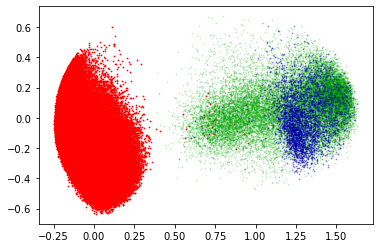

In [36]:
from matplotlib import pyplot as plt
n_compo_offset = fkv.n_word+fkv.n_compo
plt.scatter(proj[:fkv.n_word, 0], proj[:fkv.n_word, 1], c='red', s=0.5)
plt.scatter(proj[n_compo_offset:, 0], proj[n_compo_offset:, 1], c='#00AA0033', s=0.5)
plt.scatter(proj[fkv.n_word:n_compo_offset, 0], proj[fkv.n_word:n_compo_offset, 1], c='#0000AA66', s=0.5)